In [49]:
# Importar las librerías necesarias
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import requests
from io import StringIO

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

In [50]:
# URL cruda del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/ib-frida/Gender_Inequality_Project/main/Gender%20Inequality%20Index.csv'

# Descargar el archivo CSV
response = requests.get(url)
if response.status_code != 200:
    raise FileNotFoundError(f"No se pudo descargar el archivo desde la URL: {url}")

# Leer el contenido del archivo CSV en un DataFrame de pandas
data = pd.read_csv(StringIO(response.text))

# Imprimir las primeras filas del DataFrame para verificar
print(data.head())

  ISO3               Country Continent           Hemisphere  \
0  AFG           Afghanistan      Asia  Northern Hemisphere   
1  AGO                Angola    Africa  Southern Hemisphere   
2  ALB               Albania    Europe  Northern Hemisphere   
3  AND               Andorra    Europe  Northern Hemisphere   
4  ARE  United Arab Emirates      Asia  Northern Hemisphere   

  Human Development Groups UNDP Developing Regions  HDI Rank (2021)  \
0                      Low                      SA            180.0   
1                   Medium                     SSA            148.0   
2                     High                     ECA             67.0   
3                Very High                     NaN             40.0   
4                Very High                      AS             26.0   

   GII Rank (2021)  Gender Inequality Index (1990)  \
0            167.0                             NaN   
1            136.0                           0.725   
2             39.0              

In [51]:
# Mostrar las primeras filas del dataset
print(data.head())

  ISO3               Country Continent           Hemisphere  \
0  AFG           Afghanistan      Asia  Northern Hemisphere   
1  AGO                Angola    Africa  Southern Hemisphere   
2  ALB               Albania    Europe  Northern Hemisphere   
3  AND               Andorra    Europe  Northern Hemisphere   
4  ARE  United Arab Emirates      Asia  Northern Hemisphere   

  Human Development Groups UNDP Developing Regions  HDI Rank (2021)  \
0                      Low                      SA            180.0   
1                   Medium                     SSA            148.0   
2                     High                     ECA             67.0   
3                Very High                     NaN             40.0   
4                Very High                      AS             26.0   

   GII Rank (2021)  Gender Inequality Index (1990)  \
0            167.0                             NaN   
1            136.0                           0.725   
2             39.0              

In [52]:
# Mostrar información básica sobre los datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO3                            195 non-null    object 
 1   Country                         195 non-null    object 
 2   Continent                       195 non-null    object 
 3   Hemisphere                      195 non-null    object 
 4   Human Development Groups        191 non-null    object 
 5   UNDP Developing Regions         151 non-null    object 
 6   HDI Rank (2021)                 191 non-null    float64
 7   GII Rank (2021)                 170 non-null    float64
 8   Gender Inequality Index (1990)  128 non-null    float64
 9   Gender Inequality Index (1991)  128 non-null    float64
 10  Gender Inequality Index (1992)  128 non-null    float64
 11  Gender Inequality Index (1993)  128 non-null    float64
 12  Gender Inequality Index (1994)  128 

In [53]:
# Verificar si hay valores nulos
print("Valores nulos por columna:\n", data.isnull().sum())

# Eliminar filas con valores nulos
data_clean = data.dropna()

# Confirmar que no hay valores nulos y que los cambios se han aplicado
data_clean.info()

Valores nulos por columna:
 ISO3                               0
Country                            0
Continent                          0
Hemisphere                         0
Human Development Groups           4
UNDP Developing Regions           44
HDI Rank (2021)                    4
GII Rank (2021)                   25
Gender Inequality Index (1990)    67
Gender Inequality Index (1991)    67
Gender Inequality Index (1992)    67
Gender Inequality Index (1993)    67
Gender Inequality Index (1994)    67
Gender Inequality Index (1995)    65
Gender Inequality Index (1996)    65
Gender Inequality Index (1997)    65
Gender Inequality Index (1998)    59
Gender Inequality Index (1999)    54
Gender Inequality Index (2000)    51
Gender Inequality Index (2001)    46
Gender Inequality Index (2002)    45
Gender Inequality Index (2003)    42
Gender Inequality Index (2004)    39
Gender Inequality Index (2005)    36
Gender Inequality Index (2006)    33
Gender Inequality Index (2007)    32
Gender Ine

In [54]:
# Descripción general de los datos
print(data_clean.describe())


       HDI Rank (2021)  GII Rank (2021)  Gender Inequality Index (1990)  \
count        89.000000        89.000000                       89.000000   
mean        113.651685       104.157303                        0.590663   
std          42.389724        36.793928                        0.117960   
min          12.000000         7.000000                        0.261000   
25%          83.000000        77.000000                        0.505000   
50%         115.000000       106.000000                        0.600000   
75%         150.000000       135.000000                        0.694000   
max         189.000000       169.000000                        0.811000   

       Gender Inequality Index (1991)  Gender Inequality Index (1992)  \
count                       89.000000                       89.000000   
mean                         0.587854                        0.585315   
std                          0.117114                        0.116038   
min                          0.2

In [55]:
# Nombres de los Dataframes para cada uno de los indicadores
data_clean.columns

Index(['ISO3', 'Country', 'Continent', 'Hemisphere',
       'Human Development Groups', 'UNDP Developing Regions',
       'HDI Rank (2021)', 'GII Rank (2021)', 'Gender Inequality Index (1990)',
       'Gender Inequality Index (1991)', 'Gender Inequality Index (1992)',
       'Gender Inequality Index (1993)', 'Gender Inequality Index (1994)',
       'Gender Inequality Index (1995)', 'Gender Inequality Index (1996)',
       'Gender Inequality Index (1997)', 'Gender Inequality Index (1998)',
       'Gender Inequality Index (1999)', 'Gender Inequality Index (2000)',
       'Gender Inequality Index (2001)', 'Gender Inequality Index (2002)',
       'Gender Inequality Index (2003)', 'Gender Inequality Index (2004)',
       'Gender Inequality Index (2005)', 'Gender Inequality Index (2006)',
       'Gender Inequality Index (2007)', 'Gender Inequality Index (2008)',
       'Gender Inequality Index (2009)', 'Gender Inequality Index (2010)',
       'Gender Inequality Index (2011)', 'Gender Inequal

In [56]:
# Crear una copia explícita del DataFrame original
data_clean = data_clean.copy()

# Cambiar el nombre de algunas columnas para trabajar más fácilmente
data_clean.rename(columns={
    'ISO3': 'iso3',
    'Country': 'country',
    'Continent': 'continent',
    'Hemisphere': 'hemisphere',
    'Human Development Groups': 'hdp_groups',
    'UNDP Developing Regions': 'undp_dev_regions',
    'HDI Rank (2021)': 'hdi_rank',
    'GII Rank (2021)': 'gii_rank'
}, inplace=True)

# Renombrar todas las columnas que contienen "Gender Inequality Index (1991-2021)" a "gii_(year)"
data_clean.columns = [f"gii_{col.split()[-1][1:-1]}" if "Gender Inequality Index" in col else col for col in data_clean.columns]

# Verificar los nuevos nombres de las columnas
print("Nuevos nombres:")
print(data_clean.columns)

Nuevos nombres:
Index(['iso3', 'country', 'continent', 'hemisphere', 'hdp_groups',
       'undp_dev_regions', 'hdi_rank', 'gii_rank', 'gii_1990', 'gii_1991',
       'gii_1992', 'gii_1993', 'gii_1994', 'gii_1995', 'gii_1996', 'gii_1997',
       'gii_1998', 'gii_1999', 'gii_2000', 'gii_2001', 'gii_2002', 'gii_2003',
       'gii_2004', 'gii_2005', 'gii_2006', 'gii_2007', 'gii_2008', 'gii_2009',
       'gii_2010', 'gii_2011', 'gii_2012', 'gii_2013', 'gii_2014', 'gii_2015',
       'gii_2016', 'gii_2017', 'gii_2018', 'gii_2019', 'gii_2020', 'gii_2021'],
      dtype='object')


In [57]:
# Eliminar las columnas 'iso3' y 'hemisphere' del DataFrame
columns_to_drop = ['iso3', 'hemisphere']
data_clean.drop(columns=columns_to_drop, inplace=True)

# Verificar que las columnas han sido eliminadas
print("Columnas después de la eliminación:")
print(data_clean.columns)

Columnas después de la eliminación:
Index(['country', 'continent', 'hdp_groups', 'undp_dev_regions', 'hdi_rank',
       'gii_rank', 'gii_1990', 'gii_1991', 'gii_1992', 'gii_1993', 'gii_1994',
       'gii_1995', 'gii_1996', 'gii_1997', 'gii_1998', 'gii_1999', 'gii_2000',
       'gii_2001', 'gii_2002', 'gii_2003', 'gii_2004', 'gii_2005', 'gii_2006',
       'gii_2007', 'gii_2008', 'gii_2009', 'gii_2010', 'gii_2011', 'gii_2012',
       'gii_2013', 'gii_2014', 'gii_2015', 'gii_2016', 'gii_2017', 'gii_2018',
       'gii_2019', 'gii_2020', 'gii_2021'],
      dtype='object')


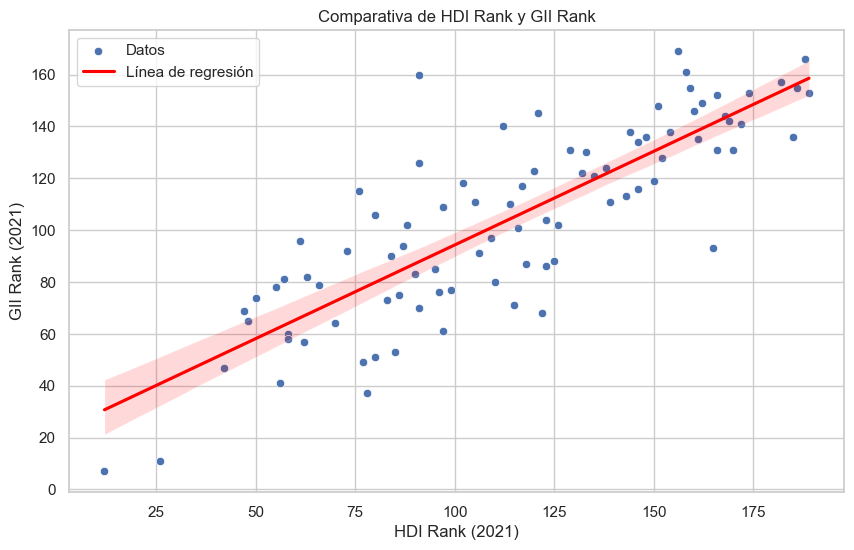

In [58]:
# Crear un gráfico de dispersión para comparar hdi_rank y gii_rank
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_clean, x='hdi_rank', y='gii_rank', label='Datos')
sns.regplot(data=data_clean, x='hdi_rank', y='gii_rank', scatter=False, color='red', label='Línea de regresión')
plt.title('Comparativa de HDI Rank y GII Rank')
plt.xlabel('HDI Rank (2021)')
plt.ylabel('GII Rank (2021)')
plt.legend()
plt.show()

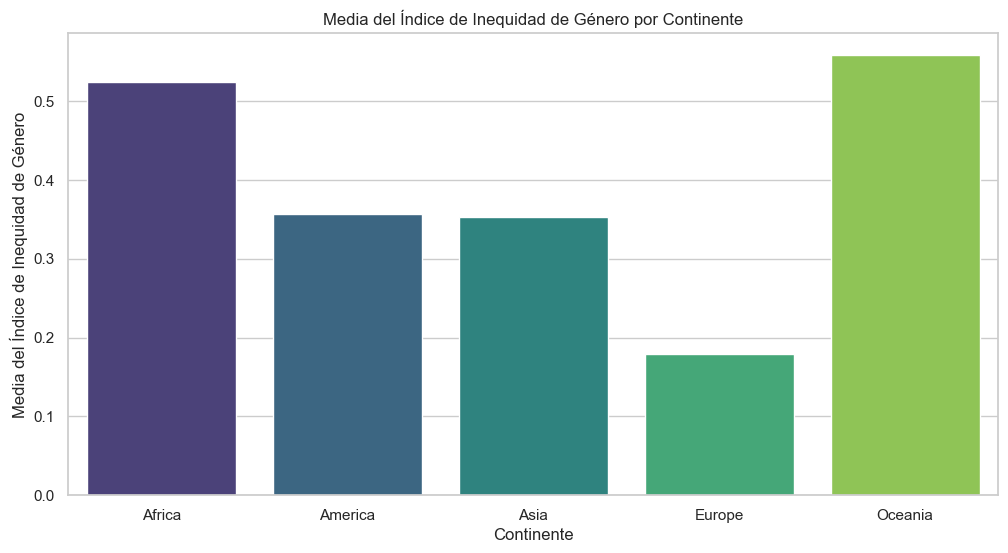

In [59]:
# Calcular la media del Índice de Inequidad de Género por continente
continent_stats = data_clean.groupby('continent')['gii_2021'].mean().reset_index()

# Crear un gráfico de barras para comparar la inequidad de género por continente
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='gii_2021', data=continent_stats, palette='viridis', hue='continent', dodge=False)
plt.title('Media del Índice de Inequidad de Género por Continente')
plt.xlabel('Continente')
plt.ylabel('Media del Índice de Inequidad de Género')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()